数据可视化
1. 导入包

2. 导入数据

3. 查看数据描述

4. 打印现有的列（特征）

5. 小牛初试：尝试将年龄分组，并且可视化，查看分布

6. 编写函数

7. 查看数据取值个数，使用unique, 取值 > 100 为连续，否则为离散。

8. 离散可视化

9. 连续可视化

10. 抽出一个特征检测是否正确

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
path_train = 'data_file/train-age-duplicate-processed.csv'
path_test = 'data_file/test-age-duplicate-processed.csv'

data_train = pd.read_csv(path_train, header=0, index_col=0)
data_test = pd.read_csv(path_test, header=0, index_col=0)

print(data_train.head(5))

         XINGBIE   AGE  HYZK  ZHIYE  ZHICHEN  ZHIWU  XUELI  DWJJLX  DWSSHY  \
id                                                                           
train_0      1.0  18.0  90.0   90.0    999.0    0.0   99.0   150.0    12.0   
train_1      2.0  35.0  90.0   90.0    999.0    0.0   99.0   110.0     0.0   
train_2      1.0  27.0  90.0   90.0    999.0    0.0   99.0   150.0     9.0   
train_3      1.0  37.0  90.0   90.0    999.0    0.0   99.0   150.0     7.0   
train_4      2.0  33.0  90.0   90.0    999.0    0.0   99.0   900.0    14.0   

          GRJCJS  GRZHZT      GRZHYE  GRZHSNJZYE  GRZHDNGJYE   GRYJCE  \
id                                                                      
train_0   1737.0     1.0    3223.515     801.310     837.000   312.00   
train_1   4894.0     1.0   18055.195   53213.220    1065.200   795.84   
train_2  10297.0     1.0   27426.600   13963.140    7230.020  1444.20   
train_3  10071.5     1.0  111871.130   99701.265    2271.295  1417.14   
train_4   2007.

In [3]:
data_train.describe()

,XINGBIE,AGE,HYZK,ZHIYE,ZHICHEN,ZHIWU,XUELI,DWJJLX,DWSSHY,GRJCJS,GRZHZT,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DKFFE,DKYE,DKLL,label
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.361900,35.671925,89.974750,89.889300,997.167725,0.000150,98.985150,247.663375,9.612775,4507.734465,1.006300,15020.190993,15316.570595,-117.379254,686.961022,190324.265725,156308.760840,2.768083,0.068925
std,0.480868,7.090278,1.461819,2.889914,42.563175,0.012247,1.212422,260.949825,5.541372,2844.622778,0.119836,20189.939168,20061.193795,7968.738147,344.924156,75334.858625,77409.960122,0.146709,0.253330
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,787.000000,1.000000,237.000000,237.000000,-240318.745000,246.550000,15237.000000,237.000000,2.292000,0.000000
25%,1.000000,31.000000,90.000000,90.000000,999.000000,0.000000,99.000000,110.000000,6.000000,2362.000000,1.000000,1892.468750,2994.080000,-577.803750,411.000000,150237.000000,110252.845000,2.708000,0.000000
50%,1.000000,34.000000,90.000000,90.000000,999.000000,0.000000,99.000000,150.000000,10.000000,3887.500000,1.000000,8545.727500,9010.740000,771.800000,616.800000,150237.000000,146210.880000,2.708000,0.000000
75%,2.000000,40.000000,90.000000,90.000000,999.000000,0.000000,99.000000,160.000000,14.000000,5831.031250,1.000000,19591.691250,19571.826250,2452.977500,849.060000,250237.000000,200844.113750,2.708000,0.000000
max,2.000000,50.000000,90.000000,90.000000,999.000000,1.000000,99.000000,900.000000,20.000000,13692.000000,6.000000,366651.575000,313348.420000,53065.095000,1745.940000,350237.000000,329776.790000,3.575000,1.000000


In [4]:
data_test.describe()

,XINGBIE,AGE,HYZK,ZHIYE,ZHICHEN,ZHIWU,XUELI,DWJJLX,DWSSHY,GRJCJS,GRZHZT,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DKFFE,DKYE,DKLL
count,15000.000000,15000.000000,15000.0,15000.000000,15000.000000,15000.000000,15000.0,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.344667,36.296200,90.0,89.945867,998.075067,0.333333,99.0,250.113933,10.445467,4613.322252,1.005000,15577.533986,15644.271147,-153.783325,704.336769,193009.411067,156060.991491,2.765257
std,0.475556,7.321523,0.0,2.000101,30.262427,0.471420,0.0,266.021032,5.646906,2814.608790,0.112735,21241.662075,20456.270282,8438.062286,342.200971,76903.407051,79102.546858,0.136417
min,0.000000,9.000000,90.0,13.000000,8.000000,0.000000,99.0,100.000000,0.000000,787.000000,1.000000,237.000000,237.000000,-195191.480000,265.643000,20237.000000,237.000000,2.292000
25%,1.000000,31.000000,90.0,90.000000,999.000000,0.000000,99.0,110.000000,6.000000,2519.000000,1.000000,1982.604000,3049.731500,-447.415000,431.564000,150237.000000,107847.636250,2.708000
50%,1.000000,35.000000,90.0,90.000000,999.000000,0.000000,99.0,150.000000,11.000000,4042.956000,1.000000,8490.962000,9239.072500,772.137000,642.148000,150237.000000,146210.880000,2.708000
75%,2.000000,41.000000,90.0,90.000000,999.000000,1.000000,99.0,170.000000,15.000000,5985.301500,1.000000,20359.459000,20051.751250,2612.150250,877.125000,261965.500000,206062.769500,2.708000
max,2.000000,50.000000,90.0,90.000000,999.000000,1.000000,99.0,900.000000,20.000000,13539.957000,6.000000,284268.290000,325406.915000,44730.235000,1745.940000,350237.000000,325527.104000,3.575000


In [5]:
# 现有的列
print(data_train.columns.to_list())

['XINGBIE', 'AGE', 'HYZK', 'ZHIYE', 'ZHICHEN', 'ZHIWU', 'XUELI', 'DWJJLX', 'DWSSHY', 'GRJCJS', 'GRZHZT', 'GRZHYE', 'GRZHSNJZYE', 'GRZHDNGJYE', 'GRYJCE', 'DKFFE', 'DKYE', 'DKLL', 'label']


          age_train  age_test
(5, 10]    0.000800  0.000733
(10, 15]   0.001150  0.001133
(15, 20]   0.002975  0.003000
(20, 25]   0.036725  0.031133
(25, 30]   0.198800  0.183067
(30, 35]   0.326550  0.309667
(35, 40]   0.196150  0.208800
(40, 45]   0.109675  0.108333
(45, 50]   0.127175  0.154133


<AxesSubplot:>

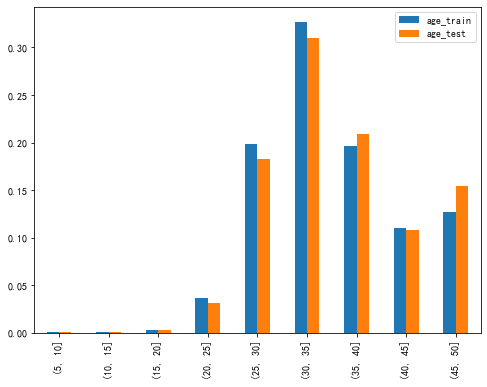

In [6]:
# 先尝试可视化一下年龄,  分组
age_train = data_train['AGE']
bins = [5*i for i in range(1, 11)]
# print(bins)
discre_data = pd.cut(age_train, bins)
aa = discre_data.value_counts()
aa = aa / np.sum(aa.values)

aa.sort_index(inplace=True)

age_test = data_test['AGE']
discre_data = pd.cut(age_test, bins)
bb = discre_data.value_counts()
bb = bb / np.sum(bb.values)
bb.sort_index(inplace=True)

cc = np.vstack((aa.values, bb.values))

df_age = pd.DataFrame(cc.T, index=aa.index.tolist(),columns=["age_train", 'age_test'])
print(df_age)
fig, ax = plt.subplots(figsize=(8, 6))
df_age.plot.bar(ax=ax)

In [7]:
# 找到所有变量可能取值，辨别是否是离散
# 在这里，认为取值个数打羽100为连续，否则为离散
feature_counts = []
for col in data_train.columns.to_list():
    feature_counts.append(len(data_train[col].value_counts()))
df_counts = pd.DataFrame(feature_counts, columns=['feature_counts'], index=data_train.columns.to_list())
print(df_counts)

            feature_counts
XINGBIE                  3
AGE                     39
HYZK                     4
ZHIYE                    7
ZHICHEN                  4
ZHIWU                    2
XUELI                    2
DWJJLX                  28
DWSSHY                  21
GRJCJS               12447
GRZHZT                   5
GRZHYE               34927
GRZHSNJZYE           37759
GRZHDNGJYE           31580
GRYJCE               16045
DKFFE                  545
DKYE                 21359
DKLL                     8
label                    2


['XINGBIE', 'AGE', 'HYZK', 'ZHIYE', 'ZHICHEN', 'ZHIWU', 'XUELI', 'DWJJLX', 'DWSSHY', 'GRZHZT', 'DKLL', 'label']
['GRJCJS', 'GRZHYE', 'GRZHSNJZYE', 'GRZHDNGJYE', 'GRYJCE', 'DKFFE', 'DKYE']


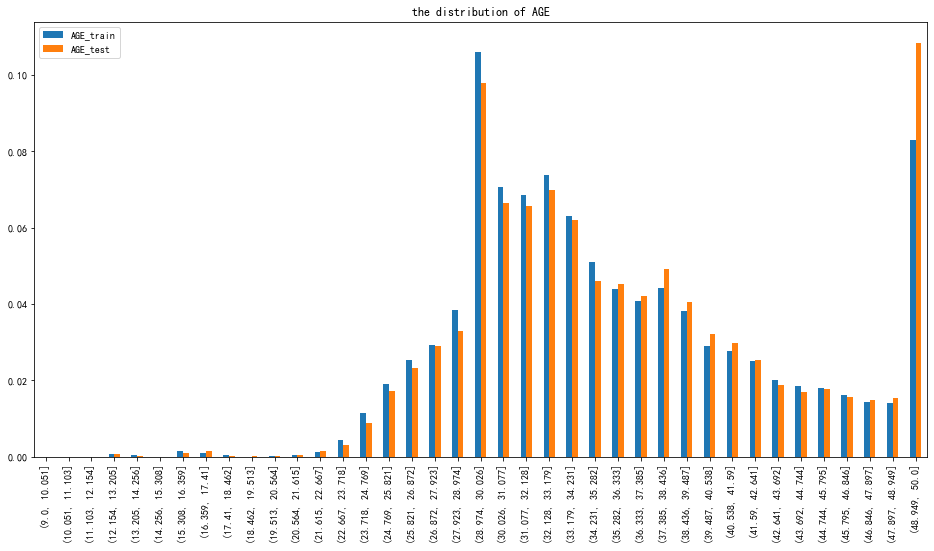

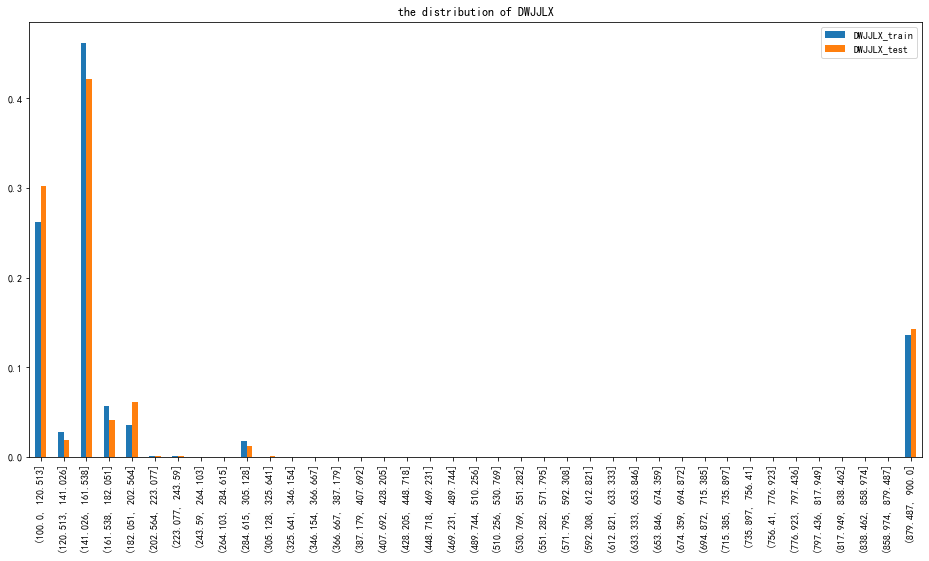

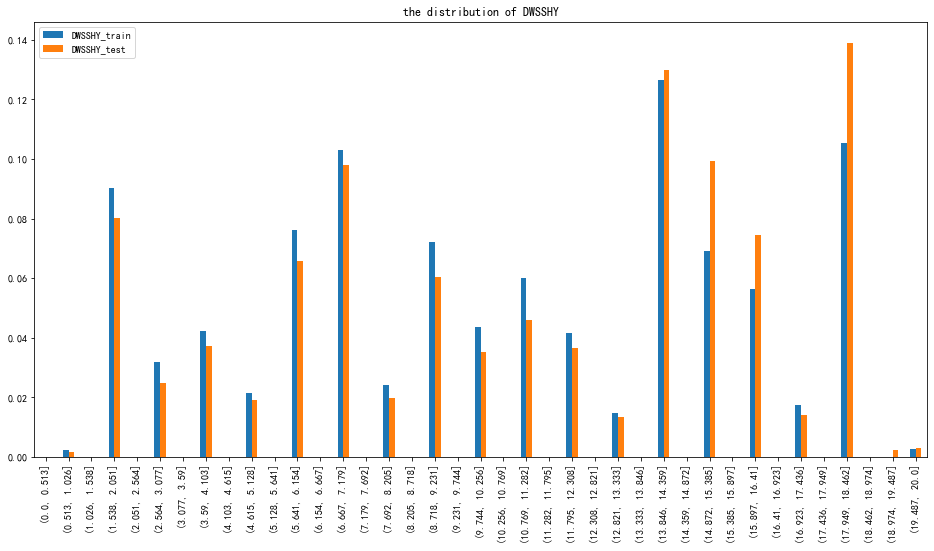

In [8]:
# 尝试写一个函数，这个函数可以对所有的变量画图
# 首先写测试集的
# 1、找到所有的特征 done
#   找到连续、离散的特征
# 2、对离散特征分组，done
# 3、对比连续特征的比例
features = data_train.columns.tolist()

# 2、找到离散、连续的特征
def find_discrete_continuous(data):
    features = data.columns.tolist()
    discrete_features = []
    continuous_features = []
    for feature in features:
        feature_counts = len(data[feature].unique())
        if feature_counts < 100:
            discrete_features.append(feature)
        else:
            continuous_features.append(feature)
    return discrete_features, continuous_features

discrete_features, continuous_features = find_discrete_continuous(data_train)
print(discrete_features)
print(continuous_features)

# 2、对离散特征分组
# （a）剪切train_data, test_data 设置一个函数 done
# (b) 合并数据 done
# (c) 画图 done

# （a）将数据切分成一段一段的

# 将两个特征的数据合并
def bin_train_test(feature, data_train=data_train, data_test=data_test):
    feature_train = data_train[feature]
    feature_test = data_test[feature]
    bin_data = np.hstack((feature_train, feature_test))

    min_, max_ = np.min(bin_data), np.max(bin_data)
    return min_, max_
    
def cut_sets(data, feature, K=40):
    pd.set_option('precision', 6)

    bins = np.linspace(*bin_train_test(feature), K)
    discre_data = pd.cut(data[feature], bins=bins)
    prop = discre_data.value_counts()
    dis_counts = prop / np.sum(prop.values)

    dis_counts.sort_index(inplace=True)

    return dis_counts

# （b）（c）组合数据，并画图
def divide_features(data_train, data_test, features):
    pd.set_option('precision', 6)
    for feature in features:
        feature_train = cut_sets(data_train, feature)
        feature_test = cut_sets(data_test, feature)

        bin_data = np.vstack((feature_train.values, feature_test.values))
        cols = [feature+'_train', feature+'_test']
        df_feature = pd.DataFrame(bin_data.T, feature_train.index.tolist(), columns=cols)

        # 画图
        # TODO: 可以使用子图
        fig, ax = plt.subplots(figsize=(16, 8))
        df_feature.plot.bar(ax=ax)
        ax.set_title("the distribution of " + feature)

discrete_features = ['AGE', 'DWJJLX', 'DWSSHY']
divide_features(data_train, data_test, discrete_features)
        
    

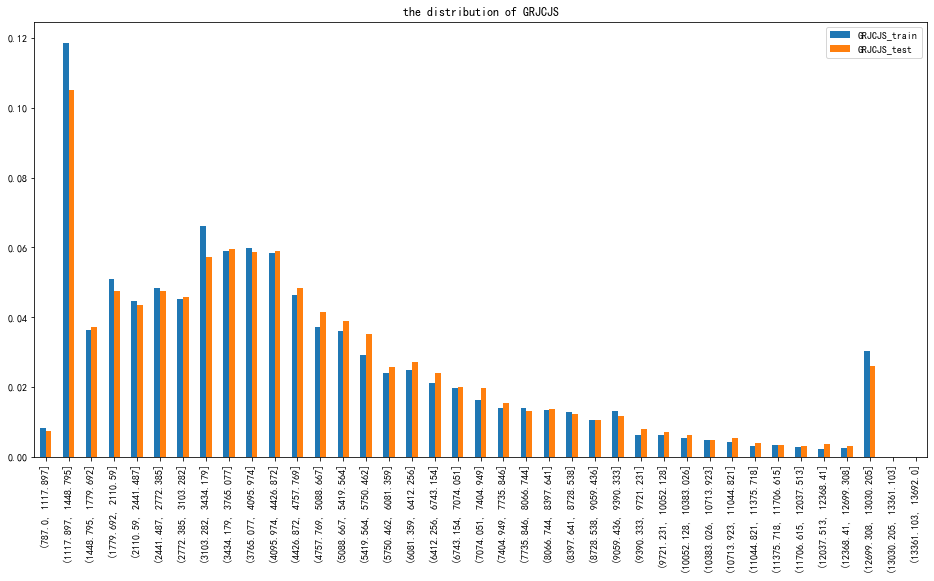

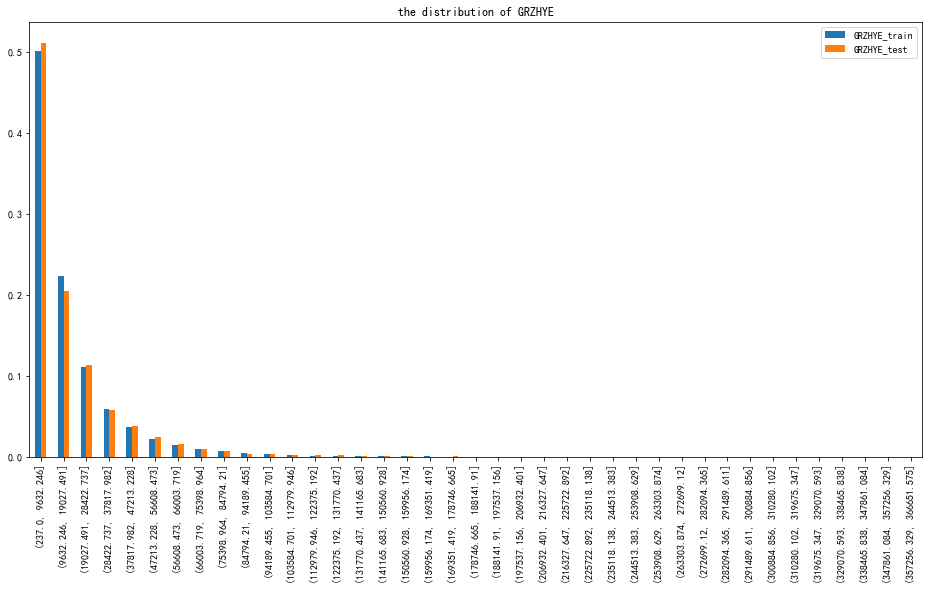

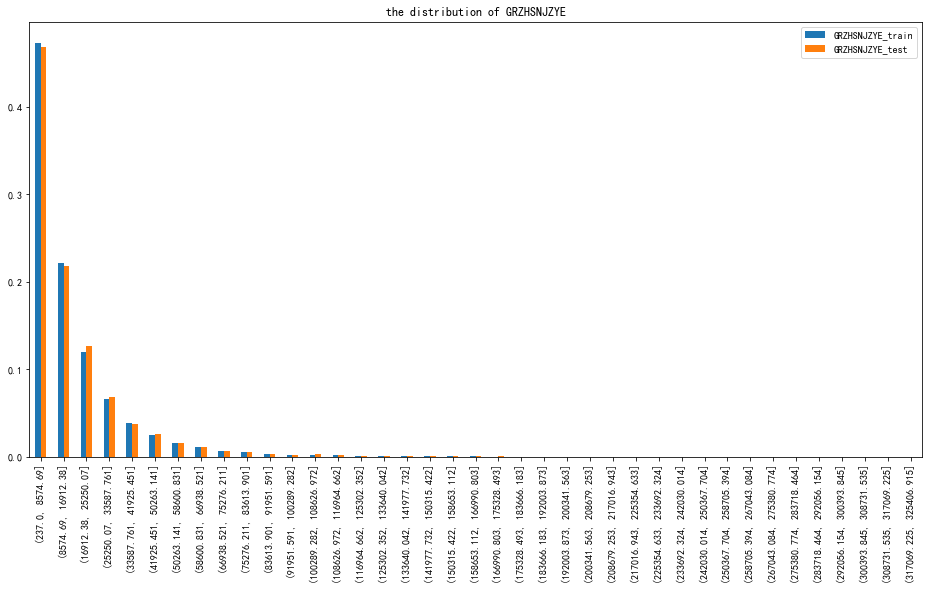

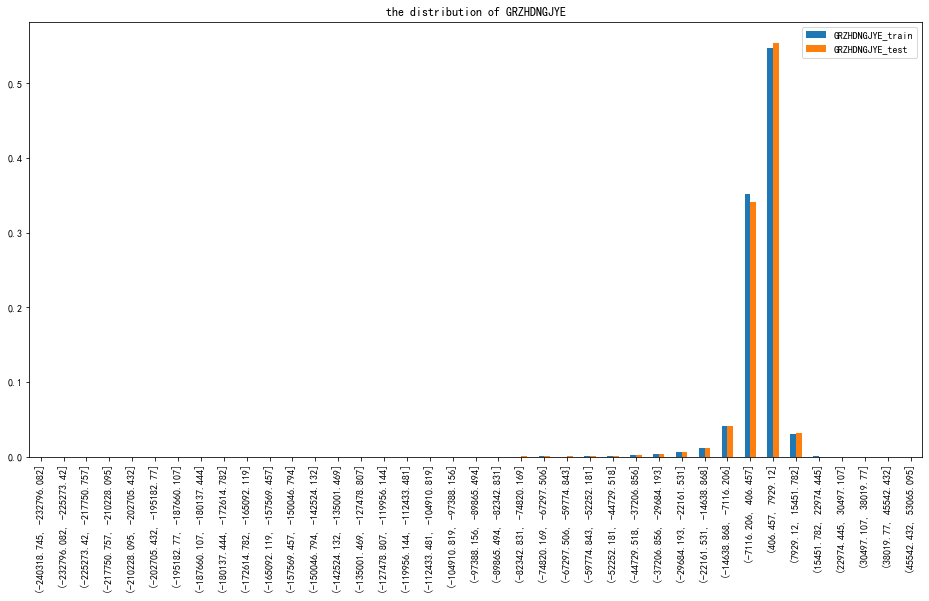

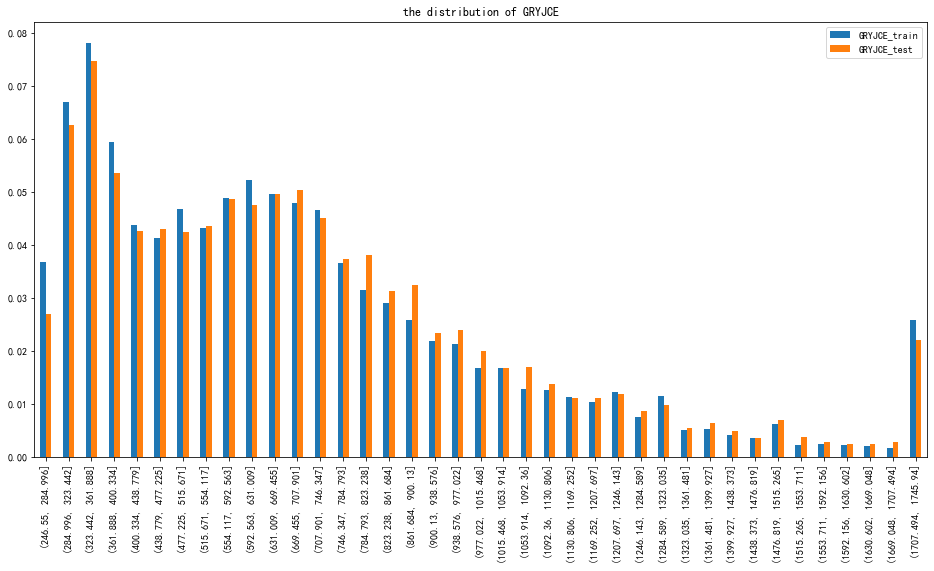

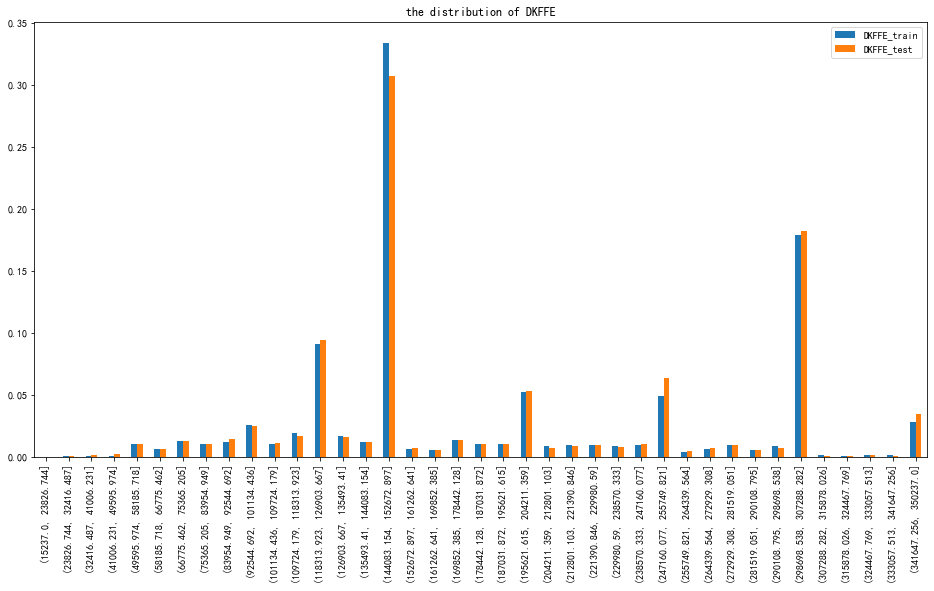

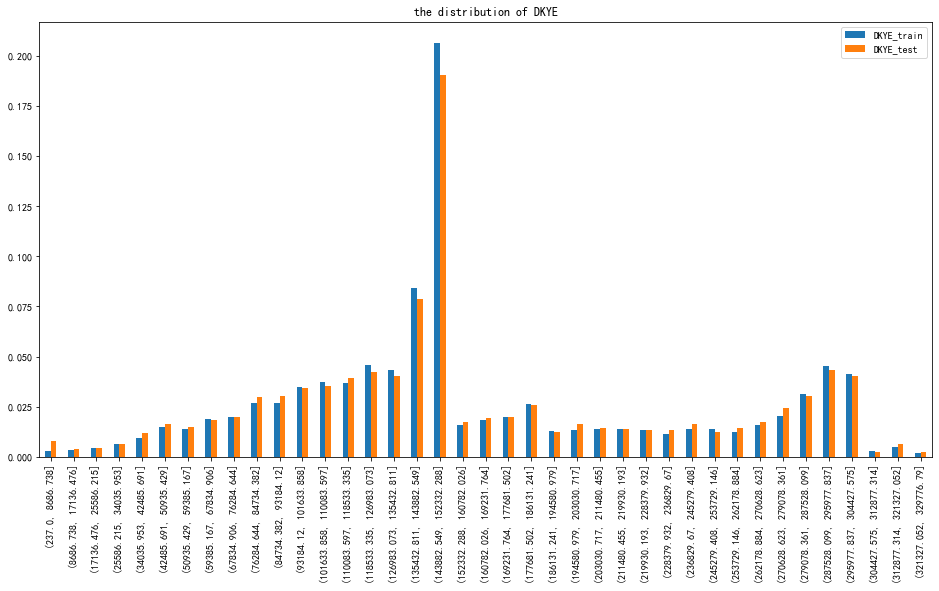

In [9]:
# 3、画出连续数据的分布
continuous_features = ['GRJCJS', 'GRZHYE', 'GRZHSNJZYE', 'GRZHDNGJYE', 'GRYJCE', 'DKFFE', 'DKYE']
divide_features(data_train, data_test, continuous_features)

-117.37925412500223
-577.80375
771.8
2452.9775
-----------------
-153.7833249999998
-447.41499999999996
772.1369999999998
2612.1502499999997


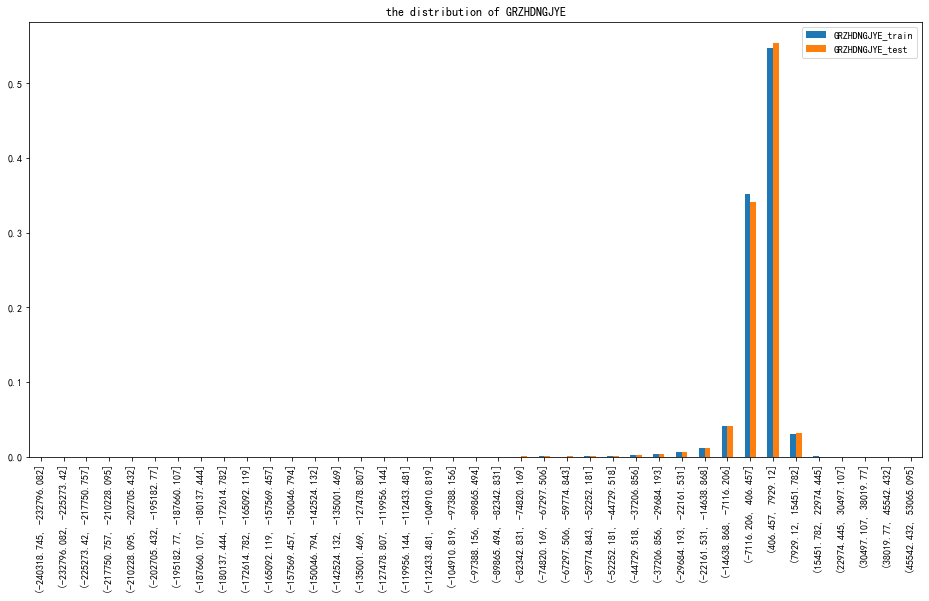

In [10]:
# 拿出一个数据，检测一下这个特征，train和test的分布是否一致
# 由图可知，一致
features = ['GRZHDNGJYE']
divide_features(data_train, data_test, features)
GRZHDNGJYE_data = data_train['GRZHDNGJYE']
print(GRZHDNGJYE_data.mean())

a = GRZHDNGJYE_data
# 25%分位数
print(np.percentile(a, 25))
# 中位数
print(np.median(a))
# 75%分位数
print(np.percentile(a, 75))
print('-----------------')
GRZHDNGJYE_data = data_test['GRZHDNGJYE']
print(GRZHDNGJYE_data.mean())

a = GRZHDNGJYE_data
# 25%分位数
print(np.percentile(a, 25))
# 中位数
print(np.median(a))
# 75%分位数
print(np.percentile(a, 75))

